## Github Classroom
Github project repository: https://github.com/cs418-fa24/project-check-in-team-11

## Project Introduction
Our project aims to understand the spotify song classification/reccomendation algorithm and to see if it can be accurately recreated. Through gathering songs and their respective specific statistics from Spotify, we will determine what aspects of songs does Spotify use the most to determine the mood classification of songs. In turn, we will then evaluate whether or not an overall mood can be determined accurately from a user's liked songs library.

## Scope Adjustments
We wanted to try and recreate the Spotify wrapped, however that was a large scope and more tailored towards recreating a listening profile based on other non-song related data such as listening history, time of day, and artist preference. We pivoted the scope to focus on song related data such as track features revolving around tempo, loudness, energy, danceability, etc.

## Data Collection and Cleaning

### Retrieve Liked Songs

In [1]:
import json

import spotipy
from spotipy.oauth2 import SpotifyOAuth

CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private user-library-read"  # now accessing private user playlists
))

# Get the user's liked songs
results = sp.current_user_saved_tracks()
liked_songs = []

while results:
    for item in results['items']:
        track = item['track']
        features = sp1.audio_features(track['id'])[0]
        liked_songs.append({
            'name': track['name'],
            'id': track['id'],
            'acousticness': features['acousticness'],
            'danceability': features['danceability'],
            'duration_ms': features['duration_ms'],
            'energy': features['energy'],
            'instrumentalness': features['instrumentalness'],
            'key': features['key'],
            'liveness': features['liveness'],
            'loudness': features['loudness'],
            'mode': features['mode'],
            'speechiness': features['speechiness'],
            'tempo': features['tempo'],
            'time_signature': features['time_signature'],
            'valence': features['valence']
        })

    results = sp.next(results)

#TODO rename the file so that it does not overwrite anyone else's
with open('/Users/conrad/dev-school/418/final-project/raw/liked_songs_1.json', 'w') as json_file:
    json.dump(liked_songs, json_file, indent=4)


SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

### Retrieve Spotify-generated Playlists for Each Mood (happy, sad, energetic, chill)

In [ ]:
### Steps to get playlists ready to pull
# 1.) Find your mix playlists for each mood (happy, sad, energetic, chill)
# 2.) Click on the "..." and add to another playlist and create a new one. Spotify will create a default name "<mood> Mix (2)"
# 3.) Once you repeat this for all the moods, you are ready to use this script

import json
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# TODO insert info same as library.py...
CLIENT_ID = ''
CLIENT_SECRET = ''
REDIRECT_URI = 'http://localhost:8888/callback'

moods = {
    'HAPPY': '37i9dQZF1EVJSvZp5AOML2',
    'SAD': '37i9dQZF1EIh4v230xvJvd',
    'CHILL': '37i9dQZF1EIdNTvkcjcOzJ',
    'ENERGETIC': '37i9dQZF1EIcVD7Tg8a0MY'
}

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

sp1 = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope="playlist-read-private"  # now accessing private user playlists
))

for mood, p_id in moods.items():
    results = sp.playlist_items(p_id)
    tracks = []

    while results:
        for item in results['items']:
            track = item['track']
            features = sp1.audio_features(track['id'])[0]

            if features is None:
                continue

            tracks.append({
                'name': track['name'],
                'id': track['id'],
                'acousticness': features['acousticness'],
                'danceability': features['danceability'],
                'duration_ms': features['duration_ms'],
                'energy': features['energy'],
                'instrumentalness': features['instrumentalness'],
                'key': features['key'],
                'liveness': features['liveness'],
                'loudness': features['loudness'],
                'mode': features['mode'],
                'speechiness': features['speechiness'],
                'tempo': features['tempo'],
                'time_signature': features['time_signature'],
                'valence': features['valence']
            })
        print("mood complete")
        # get next set of tracks
        results = sp.next(results)

    #TODO make sure to enter the number corresponding to your data
    num = 1
    with open(f'spotify_{mood.lower()}_{num}.json', 'w') as file:
        json.dump(tracks, file, indent=4)

    file.close()


### Import into Pandas Dataframe

In [ ]:
import json
import pandas as pd

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)


final_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

## Data Exploration
Our project's data consists of multiple JSON files, each representing different sets of Spotify songs categorized by moods such as chill, energetic, happy, and sad, along with a separate collection of liked songs from personal user libraries. These files contain attributes that are important in understanding song characteristics which may influence their mood classification, such as tempo, loudness, energy, danceability, and others.

In our preliminary analysis, we explored how these attributes distribute across various playlists to hypothesize which features might be most influential in determining a song's mood. We encountered significant challenges due to the size of the data files and API rate limits.

Interestingly, initial visualizations suggest clear distinctions in certain attributes among different mood-based playlists; for instance, songs in the happy playlist tend to have higher valence and tempo compared to those in the sad playlist. This aligns with our objective to differentiate between the patterns that could potentially recreate Spotify's mood classification logic. Moving forward, we plan to apply statistical tests to confirm these observations and refine our models accordingly, aiming to predict mood classifications with high accuracy.

In [ ]:
import pandas as pd
import json
import numpy as np

dfs = []

files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
]

for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        dfs.append(df)

liked_songs_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
liked_songs_df = liked_songs_df.drop(columns=drop)

#liked_songs_df.head(5)
liked_songs_df.describe()

In [ ]:
import matplotlib.pyplot as plt

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)

moods_df = pd.concat(dfs, ignore_index=True)

#processing
drop = ['name', 'id']
moods_df = moods_df.drop(columns=drop)

#moods_df.head(5)
#moods_df.describe()

moods_mean_df = moods_df.groupby('mood').mean()

#moods_mean_df.head(4)

factors = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

new_max = 100
new_min = 20
new_range = new_max - new_min

for factor in factors:
    max_val = moods_mean_df[factor].max()
    min_val = moods_mean_df[factor].min()
    val_range = max_val - min_val
    moods_mean_df[factor + '_Adj'] = moods_mean_df[factor].apply(
        lambda x: (((x - min_val) * new_range) / val_range) + new_min)
    
moods_mean_df = moods_mean_df.reset_index()
#moods_mean_df.head(4)
 
dft = moods_mean_df.loc[:, ['mood', 'acousticness_Adj', 'danceability_Adj', 'energy_Adj',
                             'instrumentalness_Adj', 'liveness_Adj', 'loudness_Adj', 'speechiness_Adj',
                             'valence_Adj', 'tempo_Adj']]
dft.rename(columns={
    'acousticness_Adj': 'acousticness',
    'danceability_Adj': 'danceability',
    'energy_Adj': 'energy',
    'instrumentalness_Adj': 'instrumentalness',
    'liveness_Adj': 'liveness',
    'loudness_Adj': 'loudness',
    'speechiness_Adj': 'speechiness',
    'valence_Adj': 'valence',
    'tempo_Adj': 'tempo'
}, inplace=True)

dft.set_index('mood', inplace=True)

labels = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

def add_to_radar(mood, color):
    values = dft.loc[mood].tolist()
    ax.plot(angles, values, color=color, linewidth=1, label=mood)
    ax.fill(angles, values, color=color, alpha=0.25)

add_to_radar('happy', '#1aaf6c')
add_to_radar('sad', '#429bf4')
add_to_radar('chill', '#d42cea')
add_to_radar('energetic', '#f4b41a')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

ax.set_ylim(0, 100)
ax.set_rlabel_position(180 / num_vars)

ax.tick_params(colors='#222222')
ax.tick_params(axis='y', labelsize=8)
ax.grid(color='#AAAAAA')
ax.spines['polar'].set_color('#222222')
ax.set_facecolor('#FAFAFA')

ax.set_title('Comparing moods across features', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


In [ ]:
happy_df = moods_df[moods_df['mood'] == 'happy']
# happy_df.head(5)
happy_df.describe()

In [ ]:
sad_df = moods_df[moods_df['mood'] == 'sad']
# sad_df.head(5)
sad_df.describe()

In [ ]:
chill_df = moods_df[moods_df['mood'] == 'chill']
# chill_df.head(5)
chill_df.describe()

In [ ]:
energetic_df = moods_df[moods_df['mood'] == 'energetic']
# energetic_df.head(5)
energetic_df.describe()

## Data Visualization
Our hypothesis is that certain song attributes are more prevalent in specific moods. To test this hypothesis, we visualized the distribution of song attributes across different moods. We focused on the following attributes: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, valence and tempo.

In [ ]:
import seaborn as sns

moods_mean_df = moods_df.groupby('mood').mean()

sns.barplot(moods_mean_df, x="instrumentalness", y="mood", hue="mood", legend=False)



In [ ]:
sns.barplot(moods_mean_df, x="valence", y="mood", hue="mood", legend=False)

In [ ]:
sns.barplot(moods_mean_df, x="speechiness", y="mood", hue="mood", legend=False)

In [ ]:
sns.barplot(moods_mean_df, x="danceability", y="mood", hue="mood", legend=False)

In [ ]:
sns.barplot(moods_mean_df, x="energy", y="mood", hue="mood", legend=False)

In [ ]:
sns.barplot(moods_mean_df, x="tempo", y="mood", hue="mood", legend=False)

In [ ]:
sns.barplot(moods_mean_df, x="loudness", y="mood", hue="mood", legend=False)

In [ ]:
sns.barplot(moods_mean_df, x="liveness", y="mood", hue="mood", legend=False)

In [ ]:
sns.barplot(moods_mean_df, x="acousticness", y="mood", hue="mood", legend=False)

### Chill
This mood seems to be characterized by higher values of acousticness and instrumentalness.

### Happy
This mood seems to be characterized by higher values of valence and lower values of instrumentalness.

### Energetic
This mood seems to be characterized by higher values of tempo, speechiness and liveness.

### Sad
This mood seems to be characterized by higher values of acousticness and lower values of instrumentalness.

### Hypothesis 2
Our second hypothesis is that there are strong correlations with certain features and they differ greatly depending on mood. Ex. High danceability is usually means high energy. To test this hypothesis, we visualized the correlation of song attributes to one another using different moods and heatmaps. 

In [ ]:
def graph_corr(table, title):
    numeric_df = table.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(10, 8))
    plt.title(title)
    sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrBr', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.show()

graph_corr(moods_mean_df, 'Average attribute correlations')


graph_corr(chill_df, 'Chill attribute correlations')
graph_corr(energetic_df, 'Energetic attribute correlations')
graph_corr(happy_df, 'Happy attribute correlations')
graph_corr(sad_df, 'Sad attribute correlations')

## ML Data Analysis


### X, y and data preparation for models

In [10]:
from scipy.stats import zscore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

moods = ['happy', 'sad', 'chill', 'energetic']
dfs = []
for mood in moods:
    files = [
        f'./raw/spotify_{mood}_1.json',
        f'./raw/spotify_{mood}_2.json',
        f'./raw/spotify_{mood}_3.json',
        f'./raw/spotify_{mood}_4.json',
        f'./raw/spotify_{mood}_5.json',
        f'./raw/spotify_{mood}_6.json',
    ]

    for file in files:
        with open(file, 'r') as fileio:
            df = pd.DataFrame(json.load(fileio))
            df['mood'] = mood
            dfs.append(df)
final_df = pd.concat(dfs, ignore_index=True)

#drop nondistinct rows
duplicate_names = final_df[final_df.duplicated(subset=['name'], keep=False)]
conflicting_moods = duplicate_names.groupby('name')['mood'].nunique()
conflicting_names = conflicting_moods[conflicting_moods > 1].index
final_df = final_df[~final_df['name'].isin(conflicting_names)]

#drop non-feature columns
drop = ['name', 'id']
final_df = final_df.drop(columns=drop)

#encode moods
label_encoder = LabelEncoder()
final_df['mood'] = label_encoder.fit_transform(final_df['mood'])

#splitting
scaler = StandardScaler()
X = final_df.iloc[:, 0:13]
X = scaler.fit_transform(X)
y = final_df.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

#remove outliers
z_scores = np.abs(zscore(X_train))
threshold = 3
outliers = np.where(z_scores > threshold)

X_train = X_train[(z_scores < threshold).all(axis=1)]
y_train = y_train[(z_scores < threshold).all(axis=1)]

### Model Training 1 - Baseline Regression Model


Classification Report:
              precision    recall  f1-score   support

       chill       0.79      0.78      0.79        96
   energetic       0.59      0.67      0.62        75
       happy       0.64      0.55      0.59        89
         sad       0.69      0.72      0.70        74

    accuracy                           0.68       334
   macro avg       0.68      0.68      0.68       334
weighted avg       0.68      0.68      0.68       334


Accuracy Score:
0.6796407185628742

Confusion Matrix:


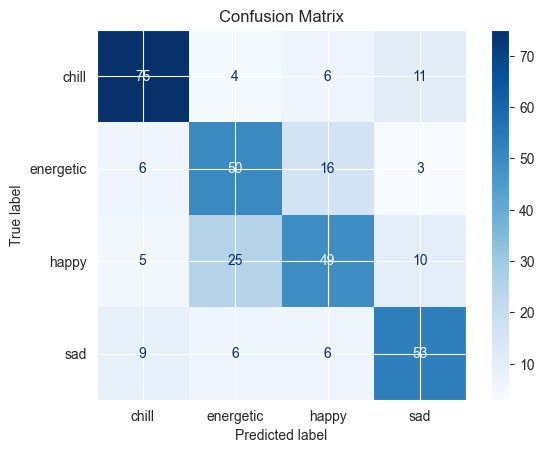

Logistic Regression Scores: [0.60714286 0.65765766 0.64864865 0.63963964 0.66666667 0.85585586
 0.81081081 0.69369369 0.72972973 0.69369369]
Average accuracy for 10 folds: 0.7004


In [30]:
from sklearn.linear_model import LogisticRegression

# initialize and train
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)
logreg.fit(X_train, y_train)

# make predictions on test
y_pred = logreg.predict(X_test)

# evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# CV testing
k = 10 
cv_scores = cross_val_score(logreg, X, y, cv=k, scoring='accuracy')
print(f"Logistic Regression Scores: {cv_scores}")
print(f"Average accuracy for {k} folds: {cv_scores.mean():.4f}")

### Model Training 2.1- Selecting the Best Model
Here we will test a bunch of different classifiers and determine which one has the highest performance.


In [31]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier

# pick best classifier
classifiers = [
    RidgeClassifier(random_state=1), SGDClassifier(random_state=1), PassiveAggressiveClassifier(random_state=1), RandomForestClassifier(random_state=1),
    GradientBoostingClassifier(random_state=1), AdaBoostClassifier(algorithm="SAMME", random_state=1),
    BaggingClassifier(random_state=1), ExtraTreesClassifier(random_state=1), SVC(random_state=1),
    LinearSVC(random_state=1), KNeighborsClassifier(),
    GaussianNB(), GaussianProcessClassifier(random_state=1)
]
scores = []
bestModel = None
bestScore = 0

for classifier in classifiers:
    meanScore = np.mean(cross_val_score(classifier, X_train, y_train, cv=10))
    scores.append(
        {
            'Name': f'{type(classifier).__name__}',
            'Score': meanScore
        }
    )

    if meanScore > bestScore:
        bestScore = meanScore
        bestModel = classifier

print(bestModel, bestScore)

RandomForestClassifier(random_state=1) 0.7588329979879276


### Model Training 2.2- RandomForestClassifier
We determined above that the RandomForestClassifier performs best. Now let us train one and create a confusion matrix for it.


Classification Report:
              precision    recall  f1-score   support

       chill       0.87      0.77      0.82        96
   energetic       0.62      0.65      0.64        75
       happy       0.69      0.69      0.69        89
         sad       0.77      0.84      0.80        74

    accuracy                           0.74       334
   macro avg       0.74      0.74      0.73       334
weighted avg       0.74      0.74      0.74       334


Accuracy Score:
0.7365269461077845

Confusion Matrix:


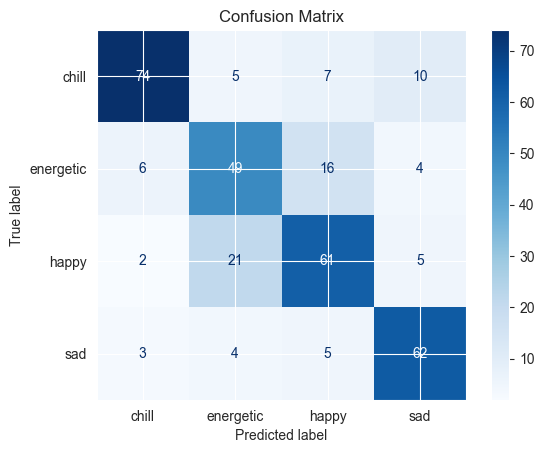

RandomForest CV Scores: [0.61607143 0.7027027  0.73873874 0.72072072 0.66666667 0.81981982
 0.81081081 0.82882883 0.85585586 0.8018018 ]
Average accuracy for 10 folds: 0.7562


In [32]:
from sklearn.ensemble import RandomForestClassifier

# initialize and fit on training data
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)

# make predictions on test
y_pred = forest.predict(X_test)

# evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# CV testing
k = 10 
cv_scores = cross_val_score(forest , X, y, cv=k, scoring='accuracy')
print(f"RandomForest CV Scores: {cv_scores}")
print(f"Average accuracy for {k} folds: {cv_scores.mean():.4f}")


### Model 3 - XGB Classifier

Classification Report:
              precision    recall  f1-score   support

       chill       0.84      0.76      0.80        96
   energetic       0.65      0.68      0.67        75
       happy       0.63      0.64      0.63        89
         sad       0.74      0.78      0.76        74

    accuracy                           0.72       334
   macro avg       0.72      0.72      0.72       334
weighted avg       0.72      0.72      0.72       334


Accuracy Score:
0.7155688622754491

Confusion Matrix:


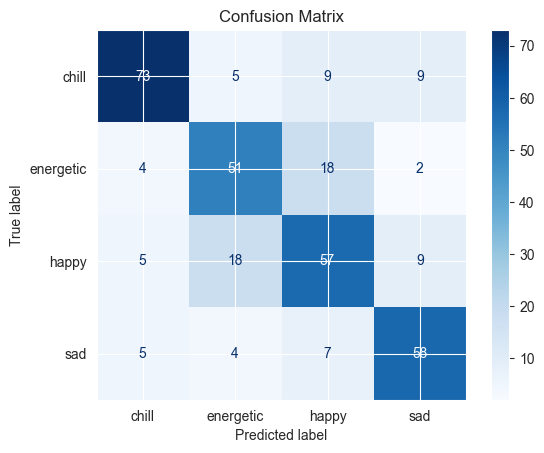

XGBoost CV Scores: [0.65470852 0.73423423 0.72072072 0.80630631 0.82882883]
Average XGBoost Accuracy: 0.7490


In [33]:
from xgboost import XGBClassifier

# train and fit the model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=1)
xgb_model.fit(X_train, y_train)

# make predictions on test
y_pred = xgb_model.predict(X_test)

# evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# CV scores
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost CV Scores: {xgb_scores}")
print(f"Average XGBoost Accuracy: {xgb_scores.mean():.4f}")


## ML Analysis on Each Member's 'Liked Songs'

We will now apply each of the models to our personal liked songs library.
This will determine the predominant mood in each person's library (~1000 songs per person)


In [44]:
import json
import pandas as pd

models = [logreg, forest, xgb_model]
dfs = []

files = [
    f'./raw/liked_songs_1.json',
    f'./raw/liked_songs_2.json',
    f'./raw/liked_songs_3.json',
    f'./raw/liked_songs_4.json',
    f'./raw/liked_songs_5.json',
    f'./raw/liked_songs_6.json',
]

for file in files:
    with open(file, 'r') as fileio:
        df = pd.DataFrame(json.load(fileio))
        dfs.append(df)

# drop unnecessary columns and scale to match trained data
columns_to_drop = ['name', 'id']
dfs = [df.drop(columns=columns_to_drop, errors='ignore') for df in dfs]
dfs = [scaler.transform(df) for df in dfs]

predictions = []
model_number = 1 
for model in models:
    print("-------------------------------------------------------------------------")
    print(f"Model {model_number} predictions:")
    print

    person = 1  

    for df in dfs:
        # generate predictions for the current model and current person data
        predictions = model.predict(df)

        # calculate mood percentages
        chill_portion = (np.sum(predictions == 0) / len(predictions)) * 100
        energetic_portion = (np.sum(predictions == 1) / len(predictions)) * 100
        happy_portion = (np.sum(predictions == 2) / len(predictions)) * 100
        sad_portion = (np.sum(predictions == 3) / len(predictions)) * 100

        # determine the majority mood
        mood_percentages = [happy_portion, sad_portion, chill_portion, energetic_portion]
        majority_index = np.argmax(mood_percentages)
        majority_percentage = np.max(mood_percentages)
        mood_names = ["happy", "sad", "chill", "energetic"]

        print(f'Person {person} listens to mostly {mood_names[majority_index].upper()} music. '
              f'{round(majority_percentage,2)}%. is of this mood.')
        # print(f' Happy: {happy_portion:.2f}%')
        # print(f' Sad: {sad_portion:.2f}%')
        # print(f' Chill: {chill_portion:.2f}%')
        # print(f' Energetic: {energetic_portion:.2f}%\n')

        person += 1

    # Increment model count
    model_number += 1

-------------------------------------------------------------------------
Model 1 predictions:
Person 1 listens to mostly CHILL music. 47.54%. is of this mood.
Person 2 listens to mostly ENERGETIC music. 46.44%. is of this mood.
Person 3 listens to mostly HAPPY music. 42.59%. is of this mood.
Person 4 listens to mostly SAD music. 70.83%. is of this mood.
Person 5 listens to mostly ENERGETIC music. 52.0%. is of this mood.
Person 6 listens to mostly ENERGETIC music. 43.66%. is of this mood.
-------------------------------------------------------------------------
Model 2 predictions:
Person 1 listens to mostly CHILL music. 48.72%. is of this mood.
Person 2 listens to mostly ENERGETIC music. 43.76%. is of this mood.
Person 3 listens to mostly ENERGETIC music. 46.3%. is of this mood.
Person 4 listens to mostly SAD music. 64.58%. is of this mood.
Person 5 listens to mostly ENERGETIC music. 54.6%. is of this mood.
Person 6 listens to mostly ENERGETIC music. 39.93%. is of this mood.
---------

## Progress reflection
#### Hardest Part of the Project:
The most challenging aspect has been handling the large data sets and managing the Spotify API rate limits, which restricted our ability to retrieve data efficiently. These technical issues required a reevaluation of our data collection strategies, including implementing caching and batching requests to better manage API usage.  
<br>
<br>

#### Initial Insights:
Our exploratory data analysis revealed that certain song attributes like tempo, valence, and energy significantly vary across different moods. For instance, 'happy' songs generally exhibit higher tempo and energy levels than 'sad' songs, which tend to feature lower valence scores.  
<br>
<br>

#### Concrete Results:
We currently have an ML model that can classify songs based on mood with ~70% accuracy.  
<br>
<br>

#### Current Problems and Adjustments:
We need to expand the amount of datapoints for training our model. To do this, we will be looking at user created playlists that have one of the four moods as the theme and testing if our classification accuracy improves.  
<br>
<br>

#### On Track:
Given that we have this preliminary model, we are on track. The next major goal is to keep improving it and to examine other relationships we could potentially find within Spotify. This could include looking more deeply at user-created playlists and patterns within those.  
<br>
<br>

#### Change in Project Direction:
There is no change in the current project direction. We are still focused on improving our model (through better data, spectorgram and feature extraction, and using public playlists with the four moods).  




## Roles and Coordination

Finding data sources and cleaning (By 11/7): Conrad Domagala, Tyler Strach


Data Exploration (By 11/15): Ceasar Attar, Andrea Carbonati


Statistical analysis (By 11/15): Juan Cruz


Data Visualization (By 11/23): Ceasar Attar, Andrea Carbonati, Rovia Simmons


Machine Learning Applications (By 11/29): Conrad Domagala, Tyler Strach

## Next Steps
### Expand Feature Analysis:
Incorporate additional features from user profiles to enrich our current model.
This can be done by getting a spectrogram of audio files, manually extracting features using libraries like
librosa and Essentia, and applying those features to our model to improve accuracy.

### Model Development:
Start training preliminary machine learning models using the cleaned and processed data.
Consider looking at different models (neural network, etc) to see if they have higher accuracy than RandomForestClassifier.

Expanding our training datasets by using user-created playlists or finding more provided from Spotify.

We can also look at hyperparamter optimization and more to optimize our model.

### Evaluate Progress:
We will assess our model's performance based on its accuracy in classifying song moods and adjust our strategies accordingly. This evaluation will help us determine if our approach aligns with the project's goals and Spotify's classification standards.